  0%|          | 0/12880 [00:00<?, ?it/s]


[['449', '330', '122', '149']]


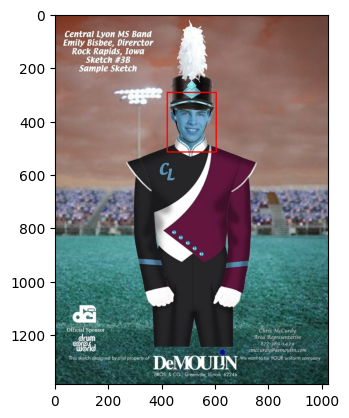

In [38]:
import os
import numpy as np
import matplotlib.pyplot as plt
from glob import glob as g
import cv2
from tqdm import tqdm
from shutil import copy, move
import os.path as osp
import matplotlib.pyplot as plt

if __name__ == '__main__':
	# Val Dataset
	label_text_name = 'wider_face/wider_face_split/wider_face_train_bbx_gt.txt'
	imgs_address = 'wider_face/WIDER_train/images'

	os.makedirs(new_imgs_dir,exist_ok = True)
	os.makedirs(new_lbls_dir,exist_ok = True)
	annots = open(label_text_name) 
	lines = annots.readlines()
	names =   [x for x in lines if 'jpg' in x]
	indices = [lines.index(x) for x in names]

	for n in tqdm(range(len(names[:]))):
		i = indices[n]
		name = lines[i].rstrip()
		old_img_path = os.path.join(imgs_address , name)
		name = name.split('/')[-1]
		label_path = os.path.join(new_lbls_dir , name.split('.')[0] + '.txt')
		img_path = os.path.join(new_imgs_dir , name)
		
		num_objs = int(lines[i+1].rstrip())		
		bboxs = lines[i+2 : i+2+num_objs]
		bboxs = list(map(lambda x:x.rstrip() , bboxs))
		bboxs = list(map(lambda x:x.split()[:4], bboxs))

		img = cv2.imread(old_img_path)
# 		img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
		img_h,img_w,_ = img.shape
		img_h,img_w,_ = img.shape
		scale=1.5
		for bbx in bboxs:
			flag = True
			x1 = int(bbx[0])
			y1 = int(bbx[1])
			w = int(bbx[2])
			h = int(bbx[3])
			if int(x1+(w*scale)) >= img_w:
				flag = False
			if int(y1+(h*scale)) >= img_h:
				flag = False
		#     #yolo:
			x = (x1 + w//2) / img_w
			y = (y1 + h//2) / img_h
			if flag:
				w = (w*scale) / img_w
				h = (h*scale) / img_h
			w = int(w*img_w)
			h = int(h*img_h)
			x1 = int(x*img_w - w//2)
			y1 = int(y*img_h - h//2)
			img = cv2.rectangle(img, (x1,y1), (x1+w,y1+h), (255,0,0), 4)
		cv2.imwrite('after_scale.jpg', img)
		plt.imshow(img)
        
		break